Project: Customer Segmentation Using RFM Analysis and K-Means Clustering
Objective:
The goal of this project is to segment customers based on their purchasing behavior using Recency, Frequency, and Monetary (RFM) Analysis and K-Means Clustering. This helps businesses identify customer groups for targeted marketing, loyalty programs, and sales optimization.



In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Load Dataset
df = pd.read_csv("C:/Users/ADMIN/Downloads/customer_transactions.csv")


In [5]:
# Convert InvoiceDate to datetime format.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
# Calculate RFM Metrics.( RFM Analysis
#RFM analysis helps categorize customers based on three factors:

#Recency (R): How recently a customer made a purchase (measured in days).
#Frequency (F): How often the customer makes purchases.
#Monetary (M): Total amount spent by the customer.
#Steps:

#The snapshot date (current reference point) is set as one day after the latest purchase in the dataset.
#Recency is calculated as the number of days since the last purchase.
#Frequency is calculated as the total number of purchases made.
#Monetary is calculated as the total revenue generated by the customer.)

snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalAmount': 'sum'  # Monetary
})

In [9]:
# Rename Columns
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetary'}, inplace=True)

In [19]:
# Scale RFM Values ( Data Normalization
#Since RFM values vary in range (e.g., monetary values are much larger than frequency counts), we use StandardScaler to normalize the values before applying clustering.

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

In [21]:
# Apply K-Means Clustering
#K-Means Clustering
#The K-Means algorithm is applied to segment customers into 4 groups.
#The optimal number of clusters can be determined using the Elbow Method (not shown in this version but can be added).
#Each customer is assigned a cluster label based on their purchasing behavior.
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

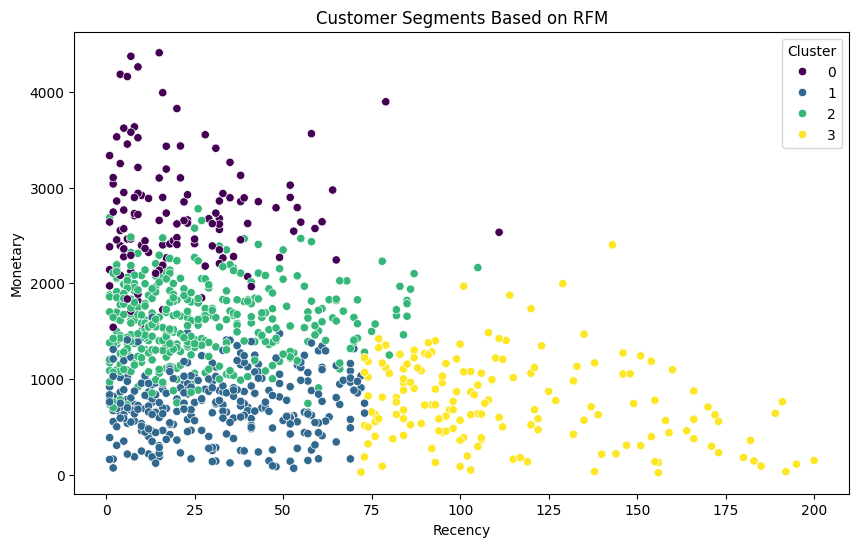

In [15]:
# Visualize Clusters
#Visualization of Customer Segments
#A scatter plot is created to visualize customer segments using Recency and Monetary values.
#Different clusters are represented with different colors to show segmentation patterns.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rfm['Recency'], y=rfm['Monetary'], hue=rfm['Cluster'], palette='viridis')
plt.title('Customer Segments Based on RFM')
plt.show()

In [23]:
# Storing the Results
#The final segmented customer data is saved into customer_segments.csv for further analysis and business decision-making.
rfm.to_csv("customer_segments.csv")
print("Customer Segmentation Completed and Saved to customer_segments.csv")

Customer Segmentation Completed and Saved to customer_segments.csv
